# Initializing

In [1]:
from IPython.display import HTML

HTML("""
<button id="code-show-switch-btn">スクリプトを非表示にする</button>

<script>
var code_show = true;

function switch_display_setting() {
    var switch_btn = $("#code-show-switch-btn");
    if (code_show) {
        $("div.input").hide();
        code_show = false;
        switch_btn.text("スクリプトを表示する");
    }else {
        $("div.input").show();
        code_show = true;
        switch_btn.text("スクリプトを非表示にする");
    }
}

$("#code-show-switch-btn").click(switch_display_setting);
</script>
""")

In [1]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

if sys.platform == "darwin":
    # For mac-OS environment (Kobayahsi)
    import stata_setup
    # stata_setup.config("/Applications/stata", "mp")
    stata_setup.config("/Applications/stata", "mp")
elif os.name == "nt":
    # For windows environment (kakehi)
    import markdown
    import warnings
    warnings.filterwarnings('ignore')
    pd.set_option('display.max_rows', 100)
    pd.set_option('display.max_columns', 100)
    pd.options.display.precision = 4
    import stata_setup
    stata_setup.config("C://Program Files//Stata18", "mp")
else:
    raise ValueError("Unsupported platform")


  ___  ____  ____  ____  ____ ®
 /__    /   ____/   /   ____/      18.0
___/   /   /___/   /   /___/       MP—Parallel Edition

 Statistics and Data Science       Copyright 1985-2023 StataCorp LLC
                                   StataCorp
                                   4905 Lakeway Drive
                                   College Station, Texas 77845 USA
                                   800-STATA-PC        https://www.stata.com
                                   979-696-4600        stata@stata.com

Stata license: Single-user 2-core  perpetual
Serial number: 501806329854
  Licensed to: Haruo Kakehi
               Keio Univertisy

Notes:
      1. Unicode is supported; see help unicode_advice.
      2. More than 2 billion observations are allowed; see help obs_advice.
      3. Maximum number of variables is set to 5,000 but can be increased;
          see help set_maxvar.


# Local macros for all graph

In [2]:
%%stata
local ltp=" plot1(lc(midblue) lpattern(solid)  lwidth(thick)) plot2(lc(navy) lpattern(solid)  lwidth(thick))"
local s1=monthly("2019m4","YM")
local s2=monthly("2021m4","YM")


. local ltp=" plot1(lc(midblue) lpattern(solid)  lwidth(thick)) plot2(lc(navy) 
> lpattern(solid)  lwidth(thick))"

. local s1=monthly("2019m4","YM")

. local s2=monthly("2021m4","YM")

. 


# Appendix A

## Figure A1: Suicide incidence per 100,000 population, April 2019 - March 2021


. qui{

. graph save ../figuretable/appendix/suicide_trans_analysis_sample.gph,replace;
(file ../figuretable/appendix/suicide_trans_analysis_sample.gph not found)
file ../figuretable/appendix/suicide_trans_analysis_sample.gph saved

. graph export ../figuretable/appendix/suicide_trans_analysis_sample.jpg, width
> (3200) replace;
(file ../figuretable/appendix/suicide_trans_analysis_sample.jpg not found)
file ../figuretable/appendix/suicide_trans_analysis_sample.jpg written in JPEG 
> format

. 


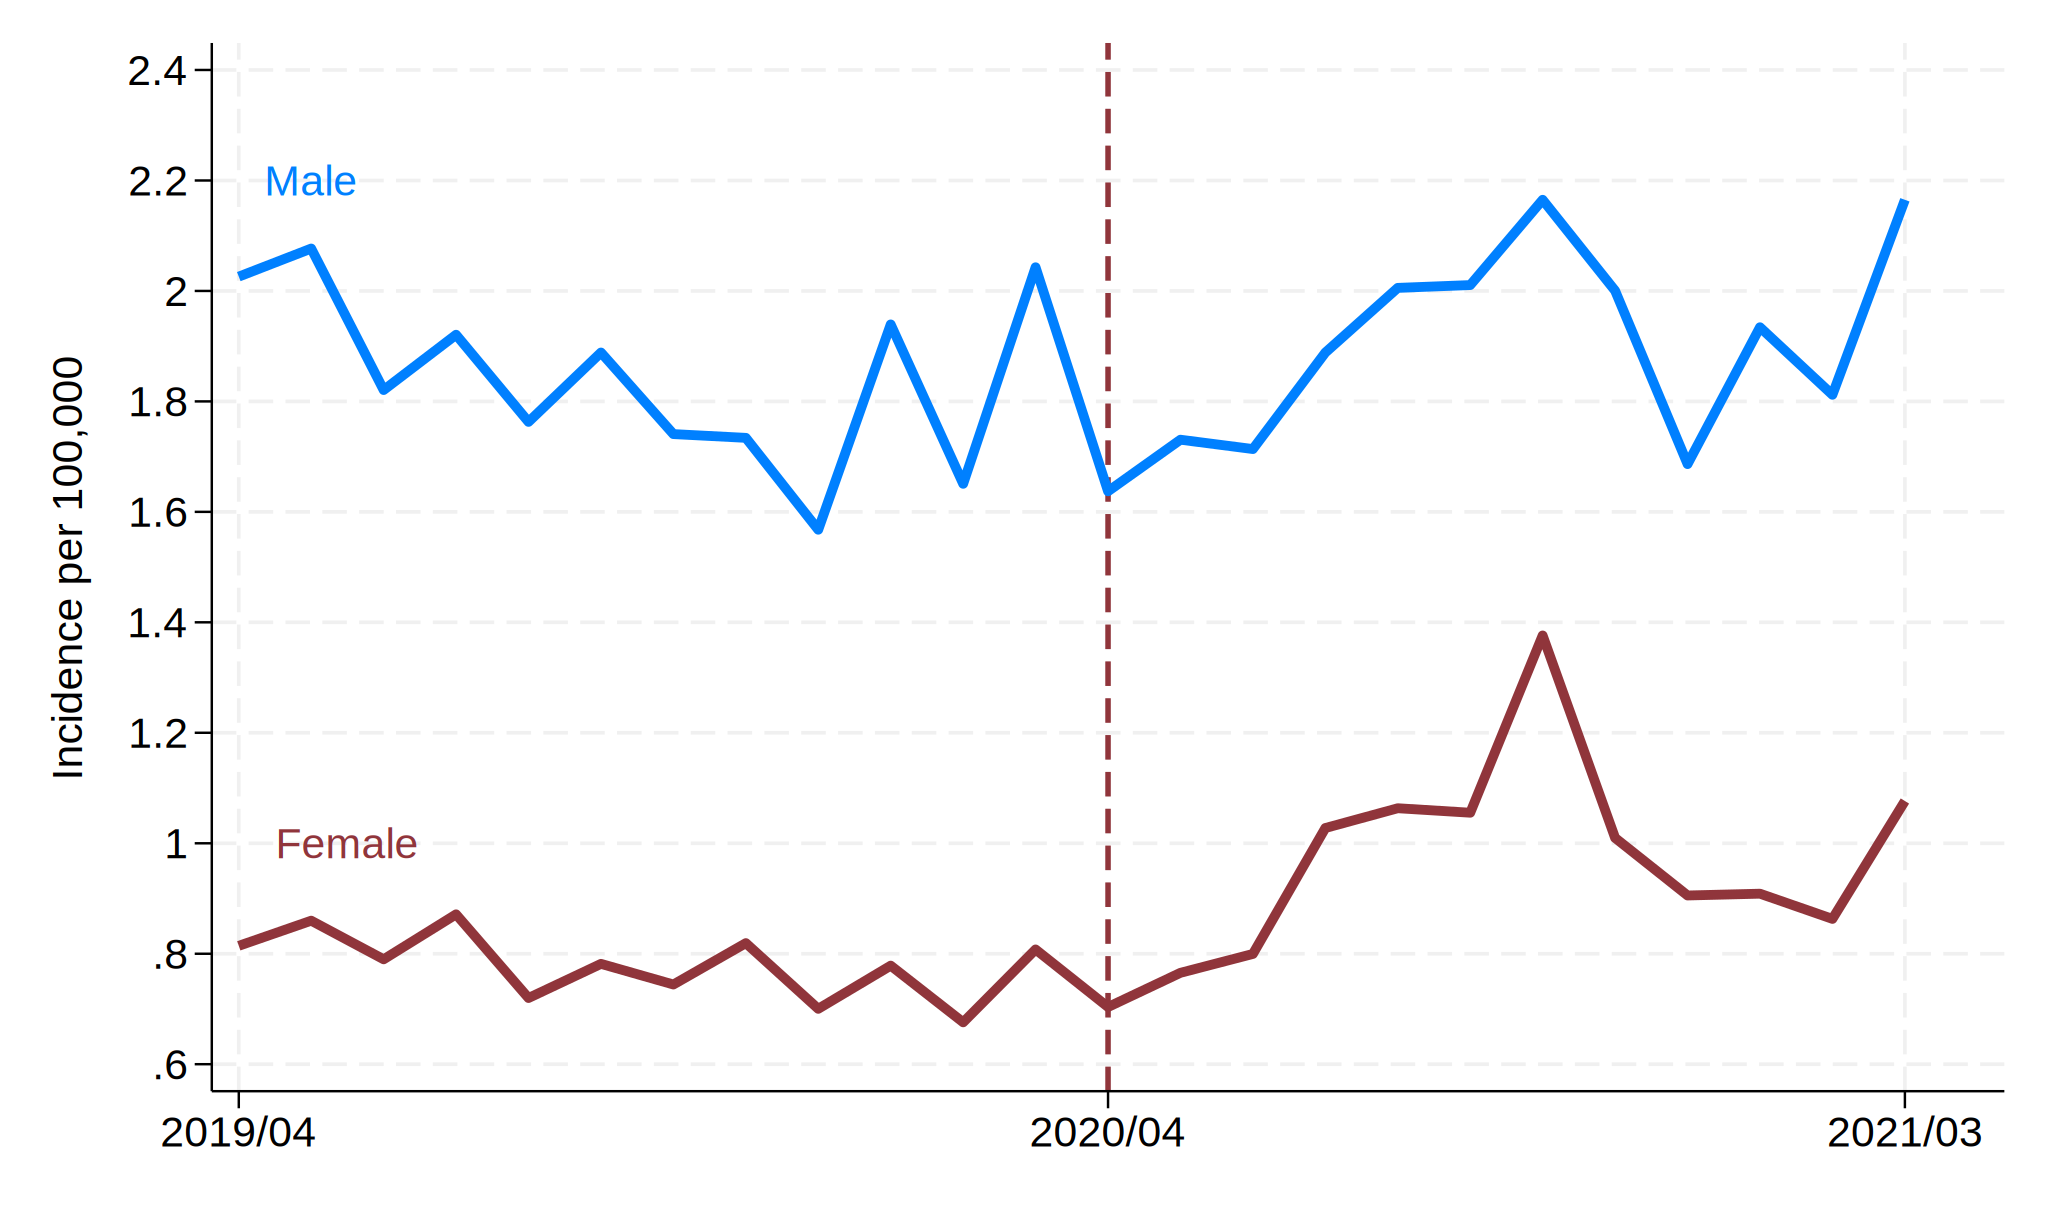

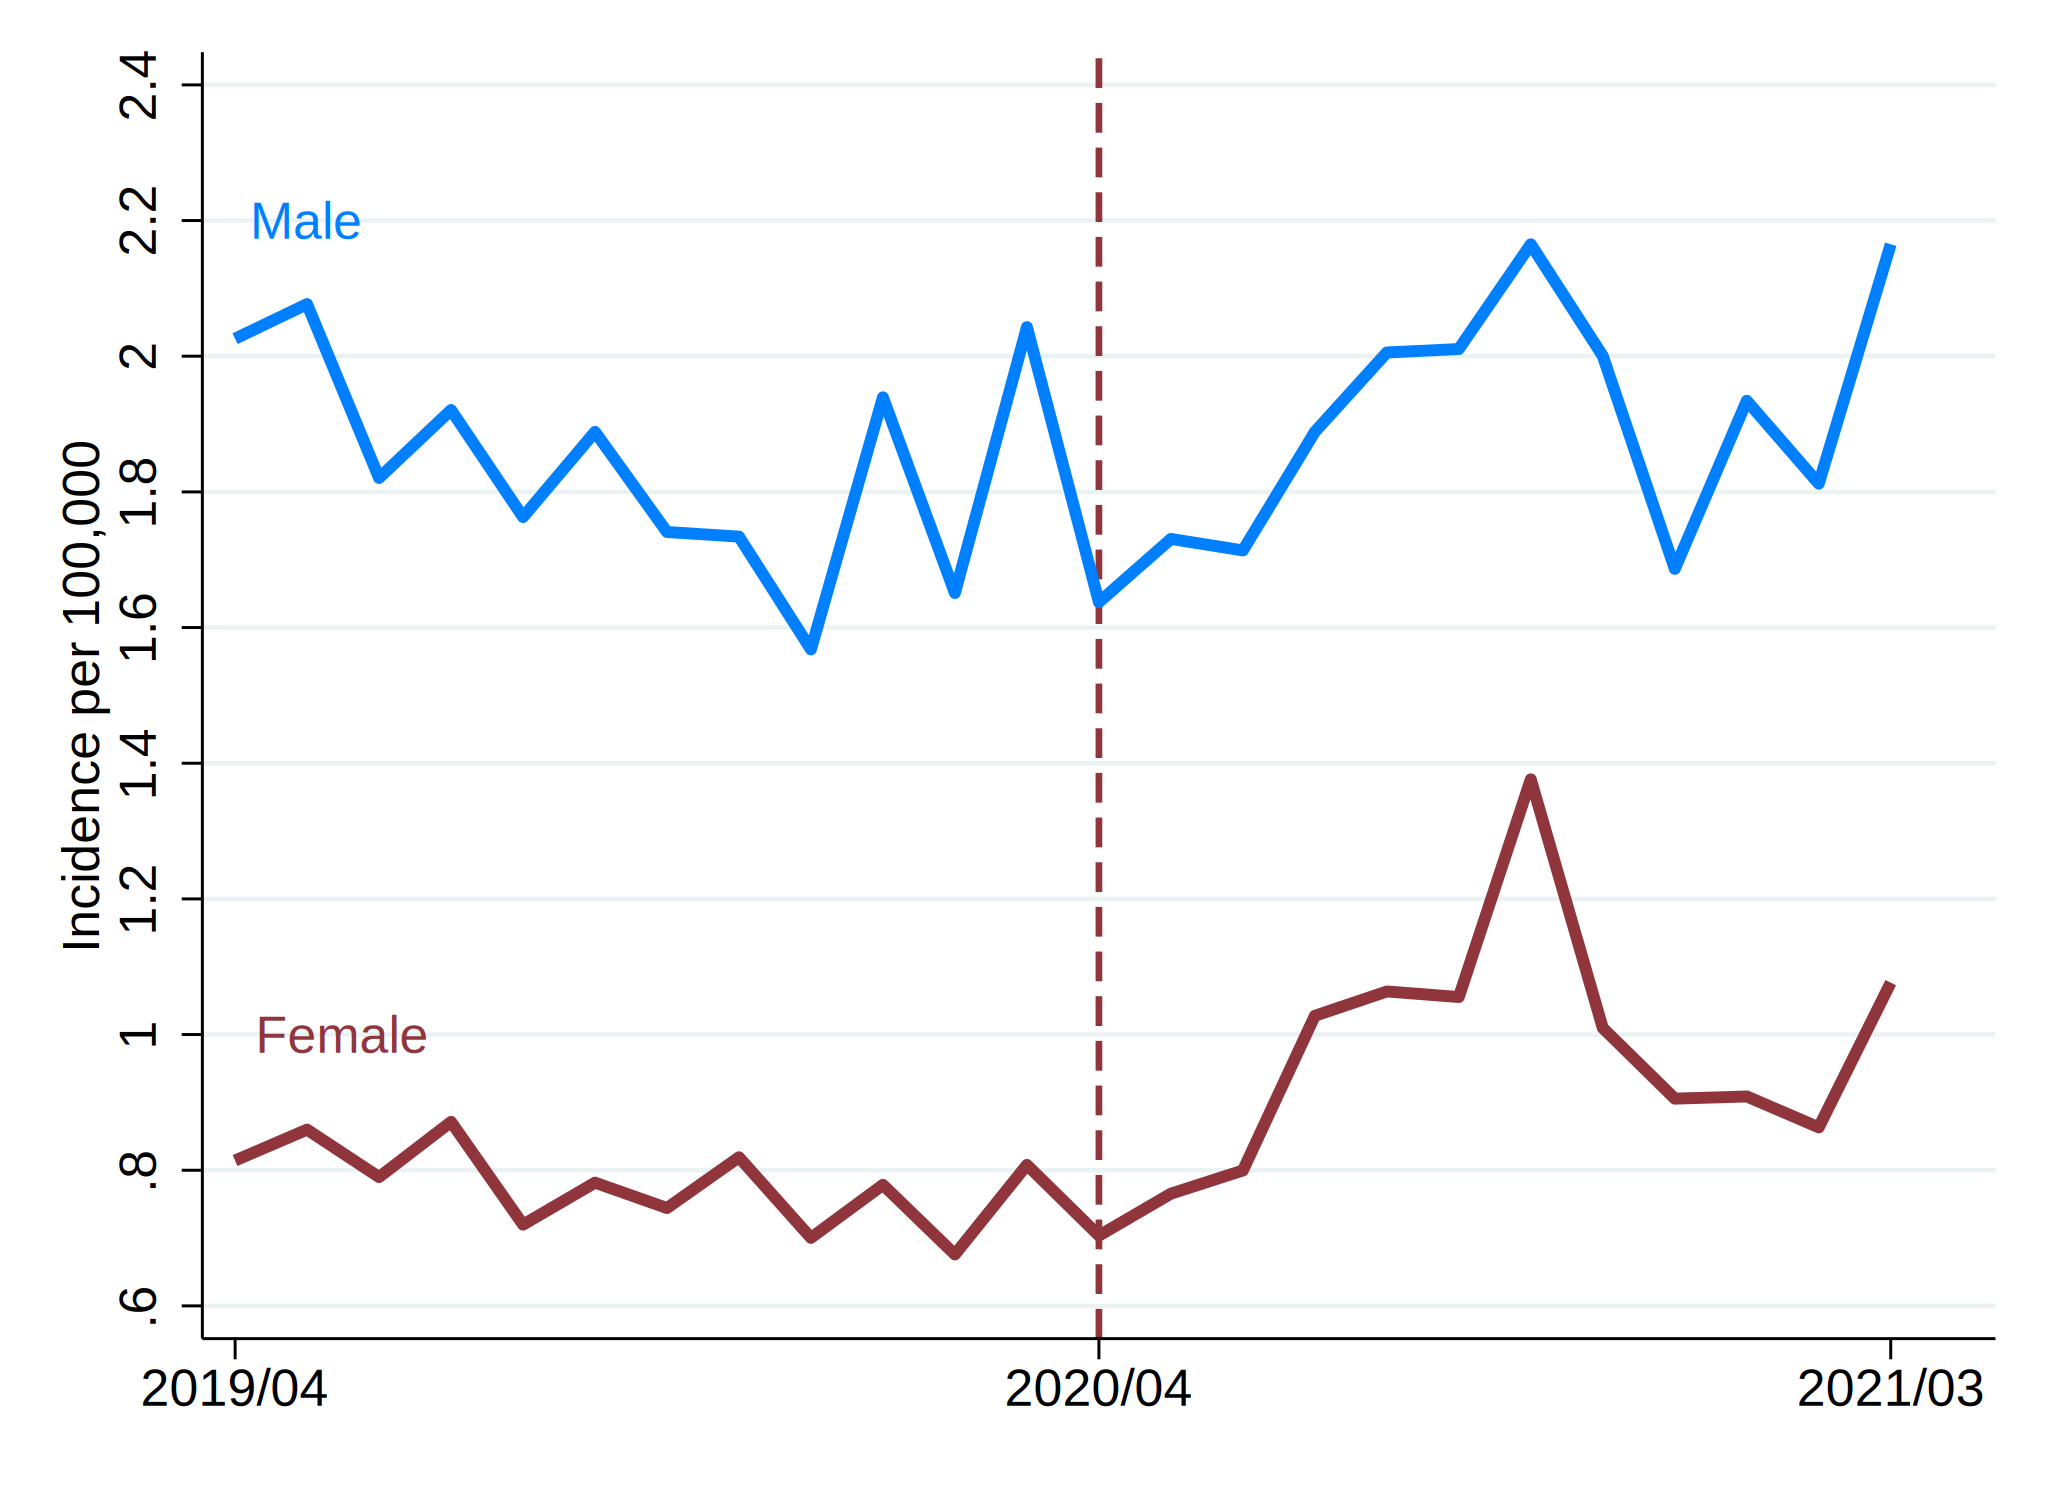

In [3]:
%%stata
qui{
use ../data/suicide_analysis_data,clear
keep if year>=2019 & year<=2021
drop if (year==2019 & month<=3)|(year==2021 & month>=4)
capture preserve
collapse (sum)  suicide_m* suicide_f*  pop_m* pop20_f* ,by(modate)

gen suicide_rate_m=suicide_m/pop_m*100000
gen suicide_rate_f=suicide_f/pop20_f*100000    
    
#delimit ;
twoway (line suicide_rate_f modate, ysc(range(0.6 2.4) ) ylabel(0.6(0.2)2.2) lwidth(thick) lcolor(maroon))  || 
    (line suicide_rate_m modate, ysc(range(0.6 2.4) ) ylabel(0.6(0.2)2.4) lwidth(thick)  lcolor(midblue))  || 
    ,legend(off) xtitle("") xsc(r(`s1' `s2')) name(suicide_trans,replace) ytitle("Incidence per 100,000" ) 
    text(2.2 712 "Male", color(midblue)) text(1.0 712.5 "Female", color(maroon)) 
    xlabel(711 "2019/04" 723 "2020/04" 734 "2021/03") graphregion(color(white)) 
    xline(723, lpattern(dash) lcolor(maroon) lwidth(medthick));
};
graph save ../figuretable/appendix/suicide_trans_analysis_sample.gph,replace;
graph export ../figuretable/appendix/suicide_trans_analysis_sample.jpg, width(3200) replace;


## Figure A2: Time Series Association between the Stay-at-Home Variable and the Google Mobility Index


. qui{

. 


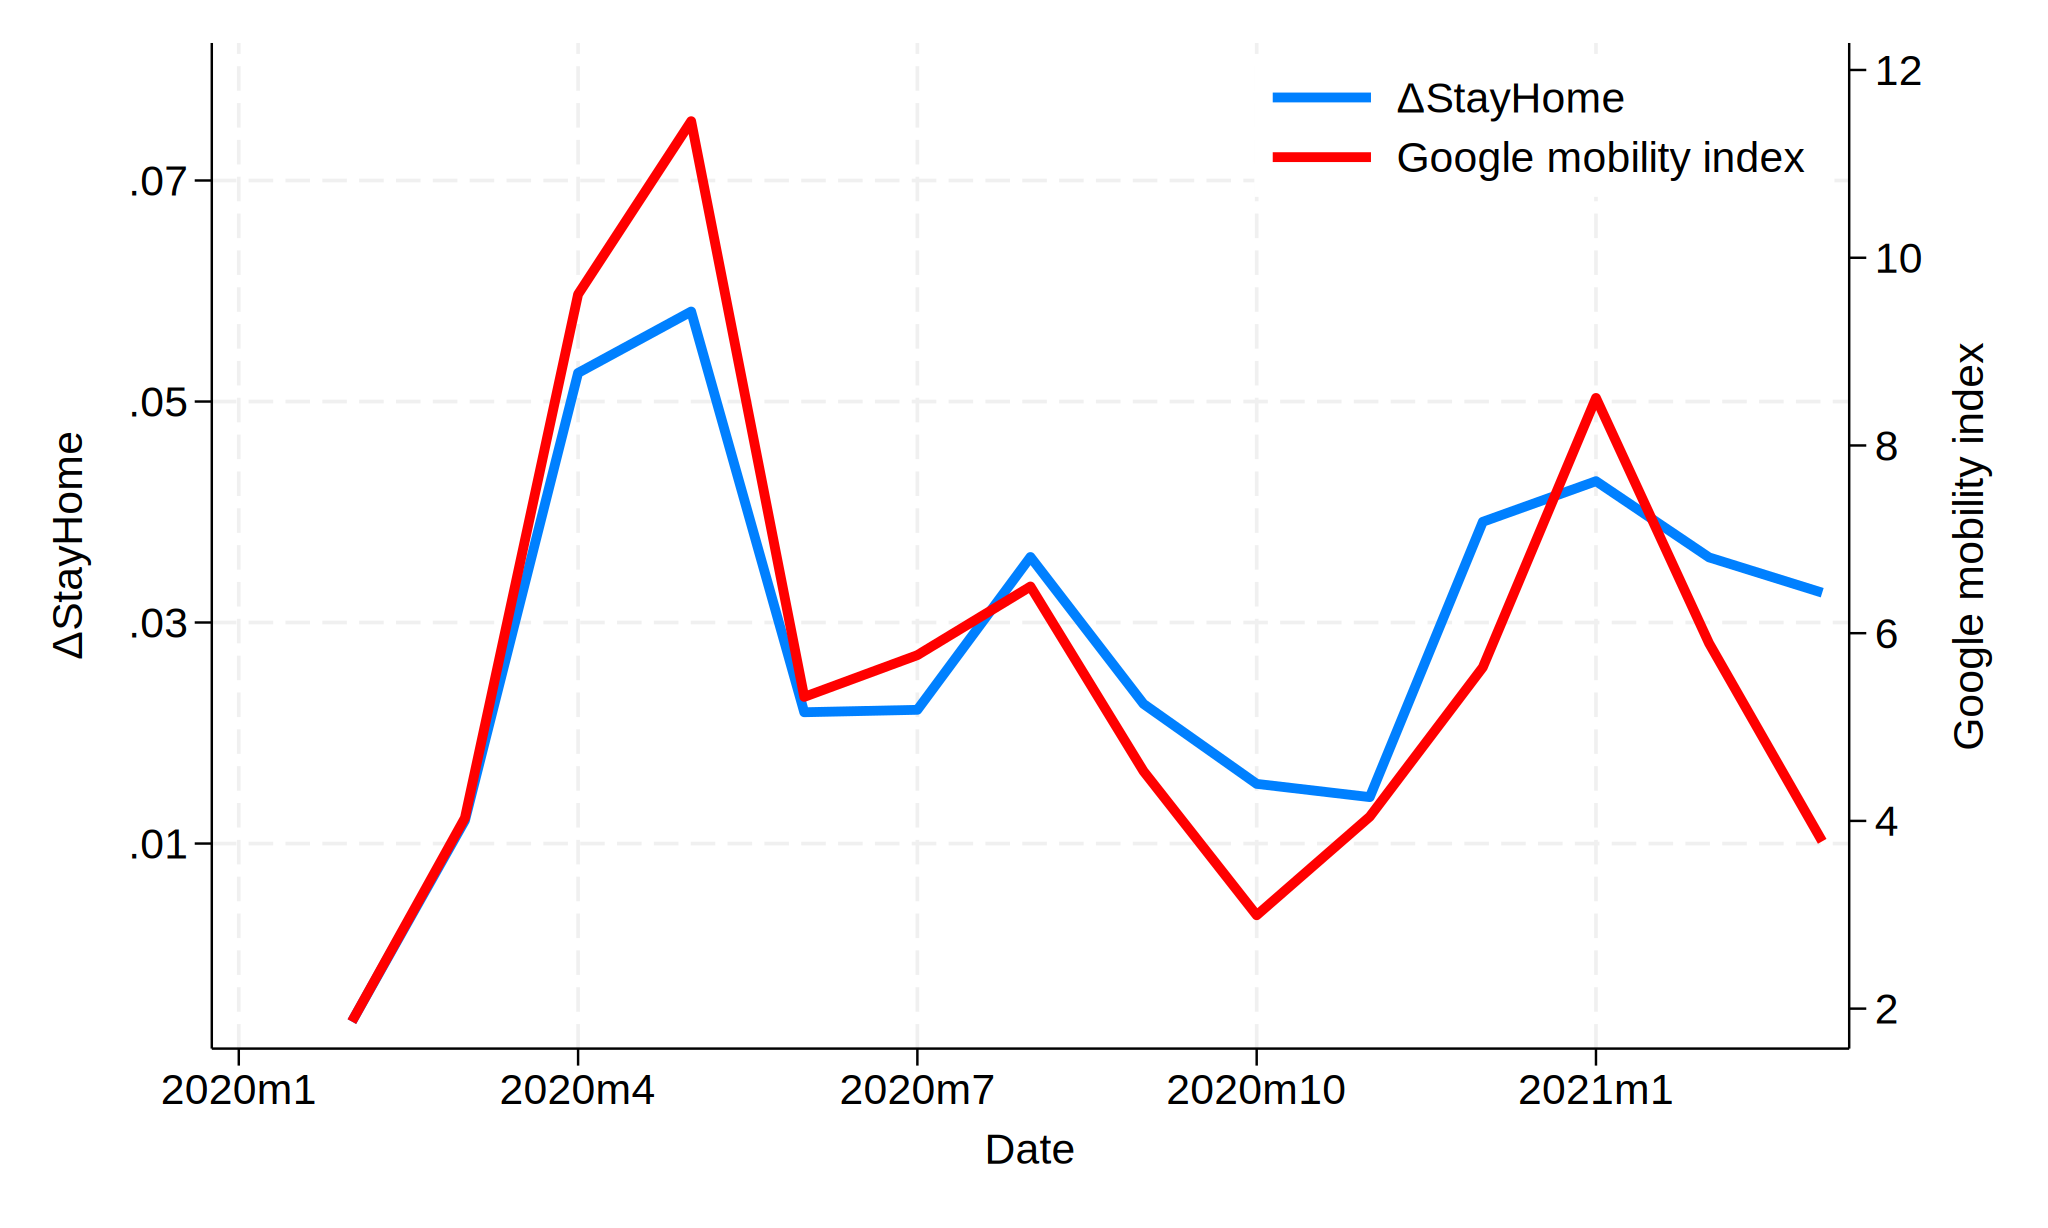

In [4]:
%%stata
qui{
local g1 retail_m
local g2 grocery_m
local g3 parks_m
local g4 station_m
local g5 workplaces_m
local g6 residential_m

#delimit ;
use ../data/index_correlation.dta, clear;
collapse (mean) d_stay_home_pref `g6', by(ym);

twoway line d_stay_home_pref ym, 
    lwidth(thick) lcolor(midblue)
    yaxis(1) ytitle("{&Delta}StayHome") xtitle("Date") 
|| line `g6' ym, 
    lwidth(thick) lcolor(red)
    legend(label(1 "{&Delta}StayHome") label(2 "Google mobility index") position(2) ring(0) col(1) region(lstyle(none))) 
    yaxis(2) 
    ytitle("Google mobility index", axis(2)) 
    ylabel(0.01(0.02)0.07) 
    yscale(r(0.08)) 
    graphregion(color(white));
graph save ../figuretable/appendix/shi_`g6'_time.gph, replace;
graph export ../figuretable/appendix/shi_`g6'_time.jpg, width(3200) height(2000) replace;
};

## Figure A3: Regional Association between the Stay-at-Home Variable and the Google Mobility Index


. qui{

. 


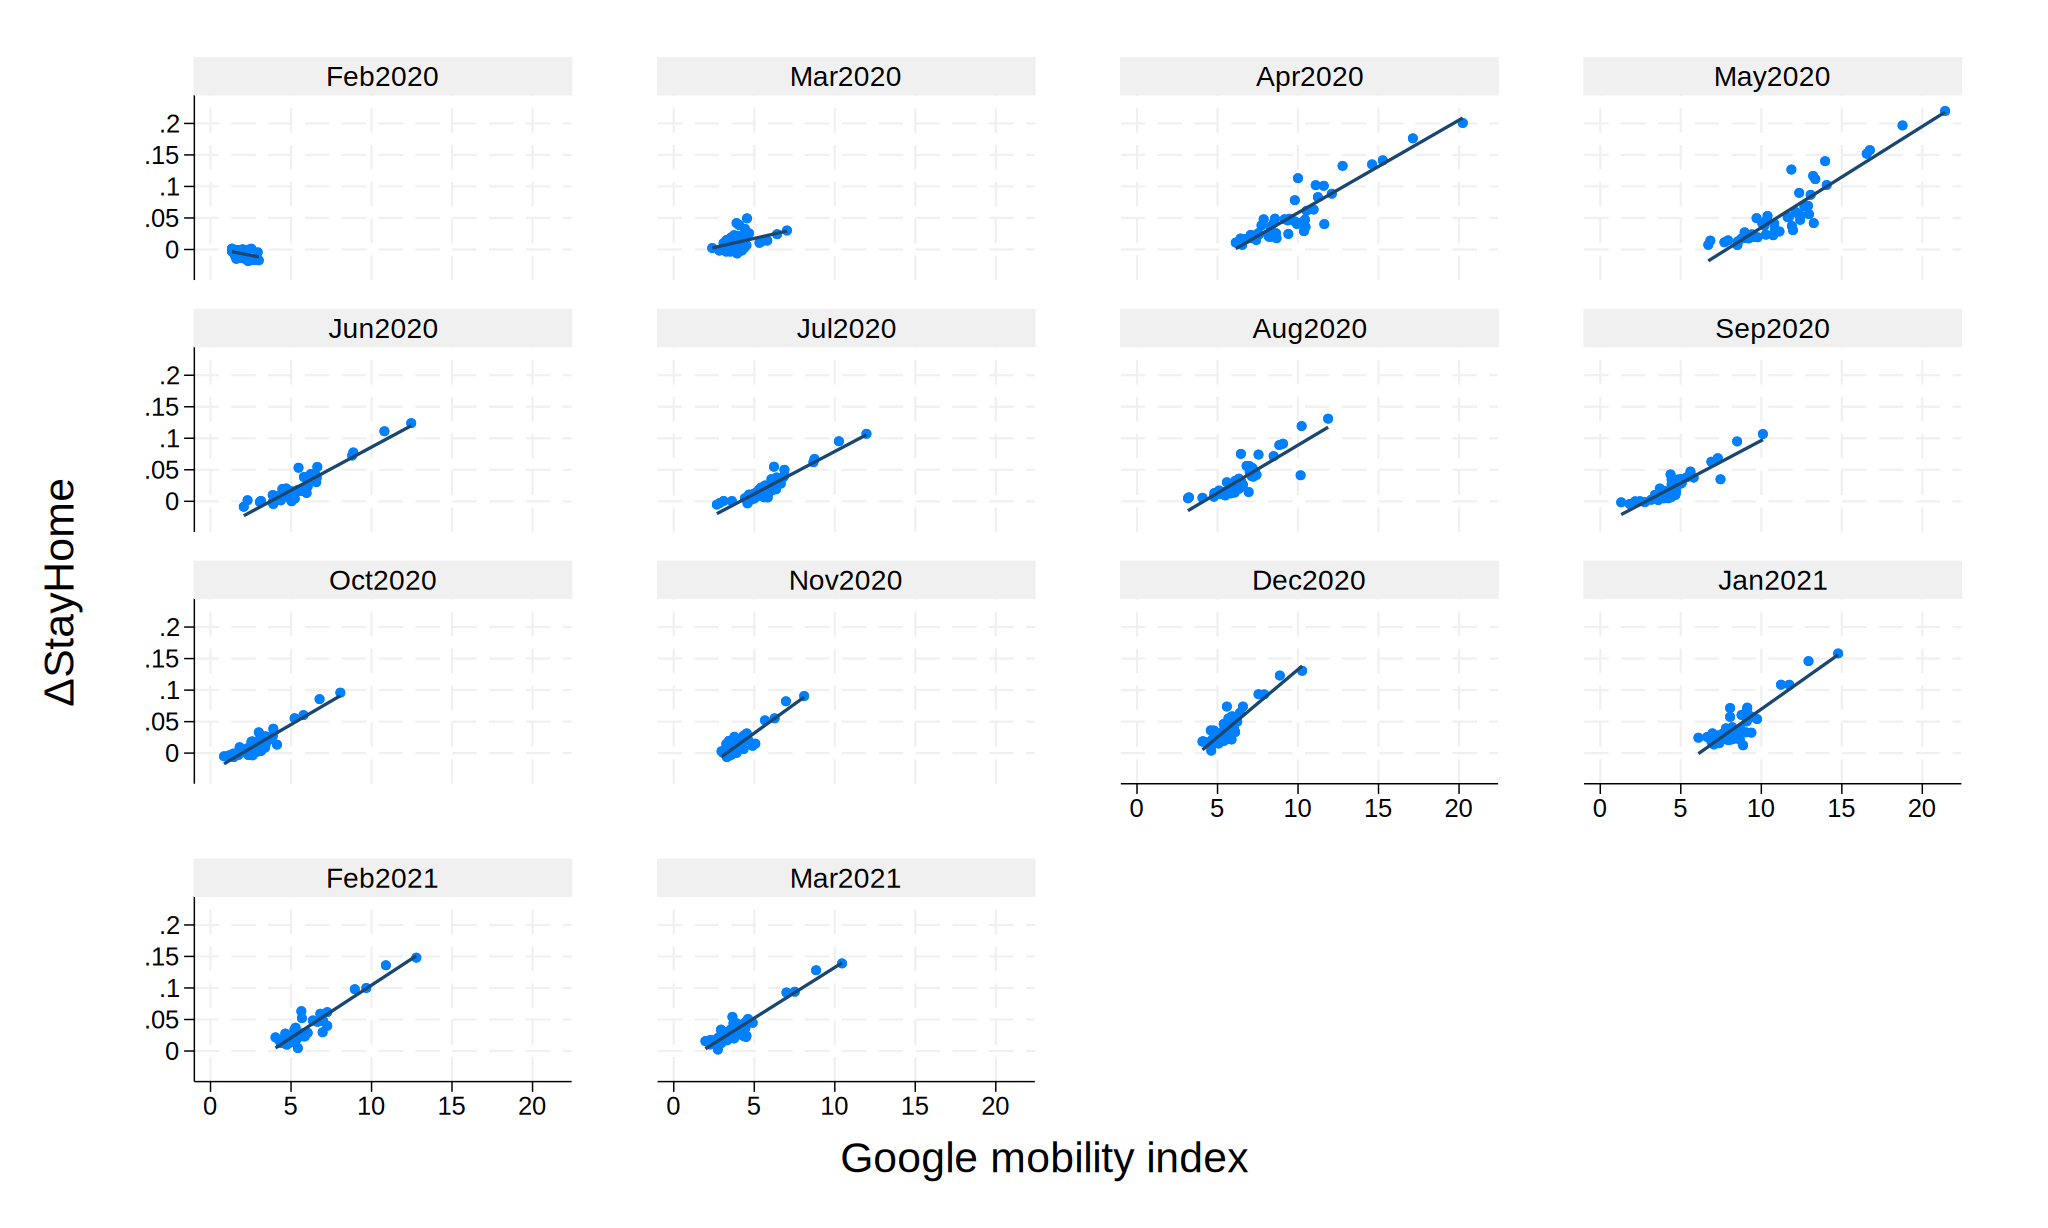

In [5]:
%%stata
qui{
use ../data/index_correlation.dta, clear

#delimit ;
twoway (scatter d_stay_home_pref `g6', mcolor(midblue) msize(small))
       (lfit d_stay_home_pref `g6', lwidth(medthick) lcolor(navy)),
        by(ym, legend(off) graphregion(color(white)) note(""))
        xtitle("Google mobility index") 
        ytitle("{&Delta}StayHome") 
        legend(off)
        graphregion(color(white));
graph save ../figuretable/appendix/shi_`g6'_ym.gph, replace;
graph export ../figuretable/appendix/shi_`g6'_ym.jpg, width(3200) replace;
};

## Figure A.2: Foot Traffic Data: Examples

In [7]:
%%stata
net install grc1leg, from(http://www.stata.com/users/vwiggins/)

checking grc1leg consistency and verifying not already installed...
installing into C:\Users\ponta\ado\plus\...
installation complete.



. 
. qui{

. 
. graph save ../figuretable/appendix/foot_trafic_stay_home_index.gph,replace
(file ../figuretable/appendix/foot_trafic_stay_home_index.gph not found)
file ../figuretable/appendix/foot_trafic_stay_home_index.gph saved

. graph export ../figuretable/appendix/foot_trafic_stay_home_index.jpg, width(3
> 200) replace
(file ../figuretable/appendix/foot_trafic_stay_home_index.jpg not found)
file ../figuretable/appendix/foot_trafic_stay_home_index.jpg written in JPEG fo
> rmat

. 


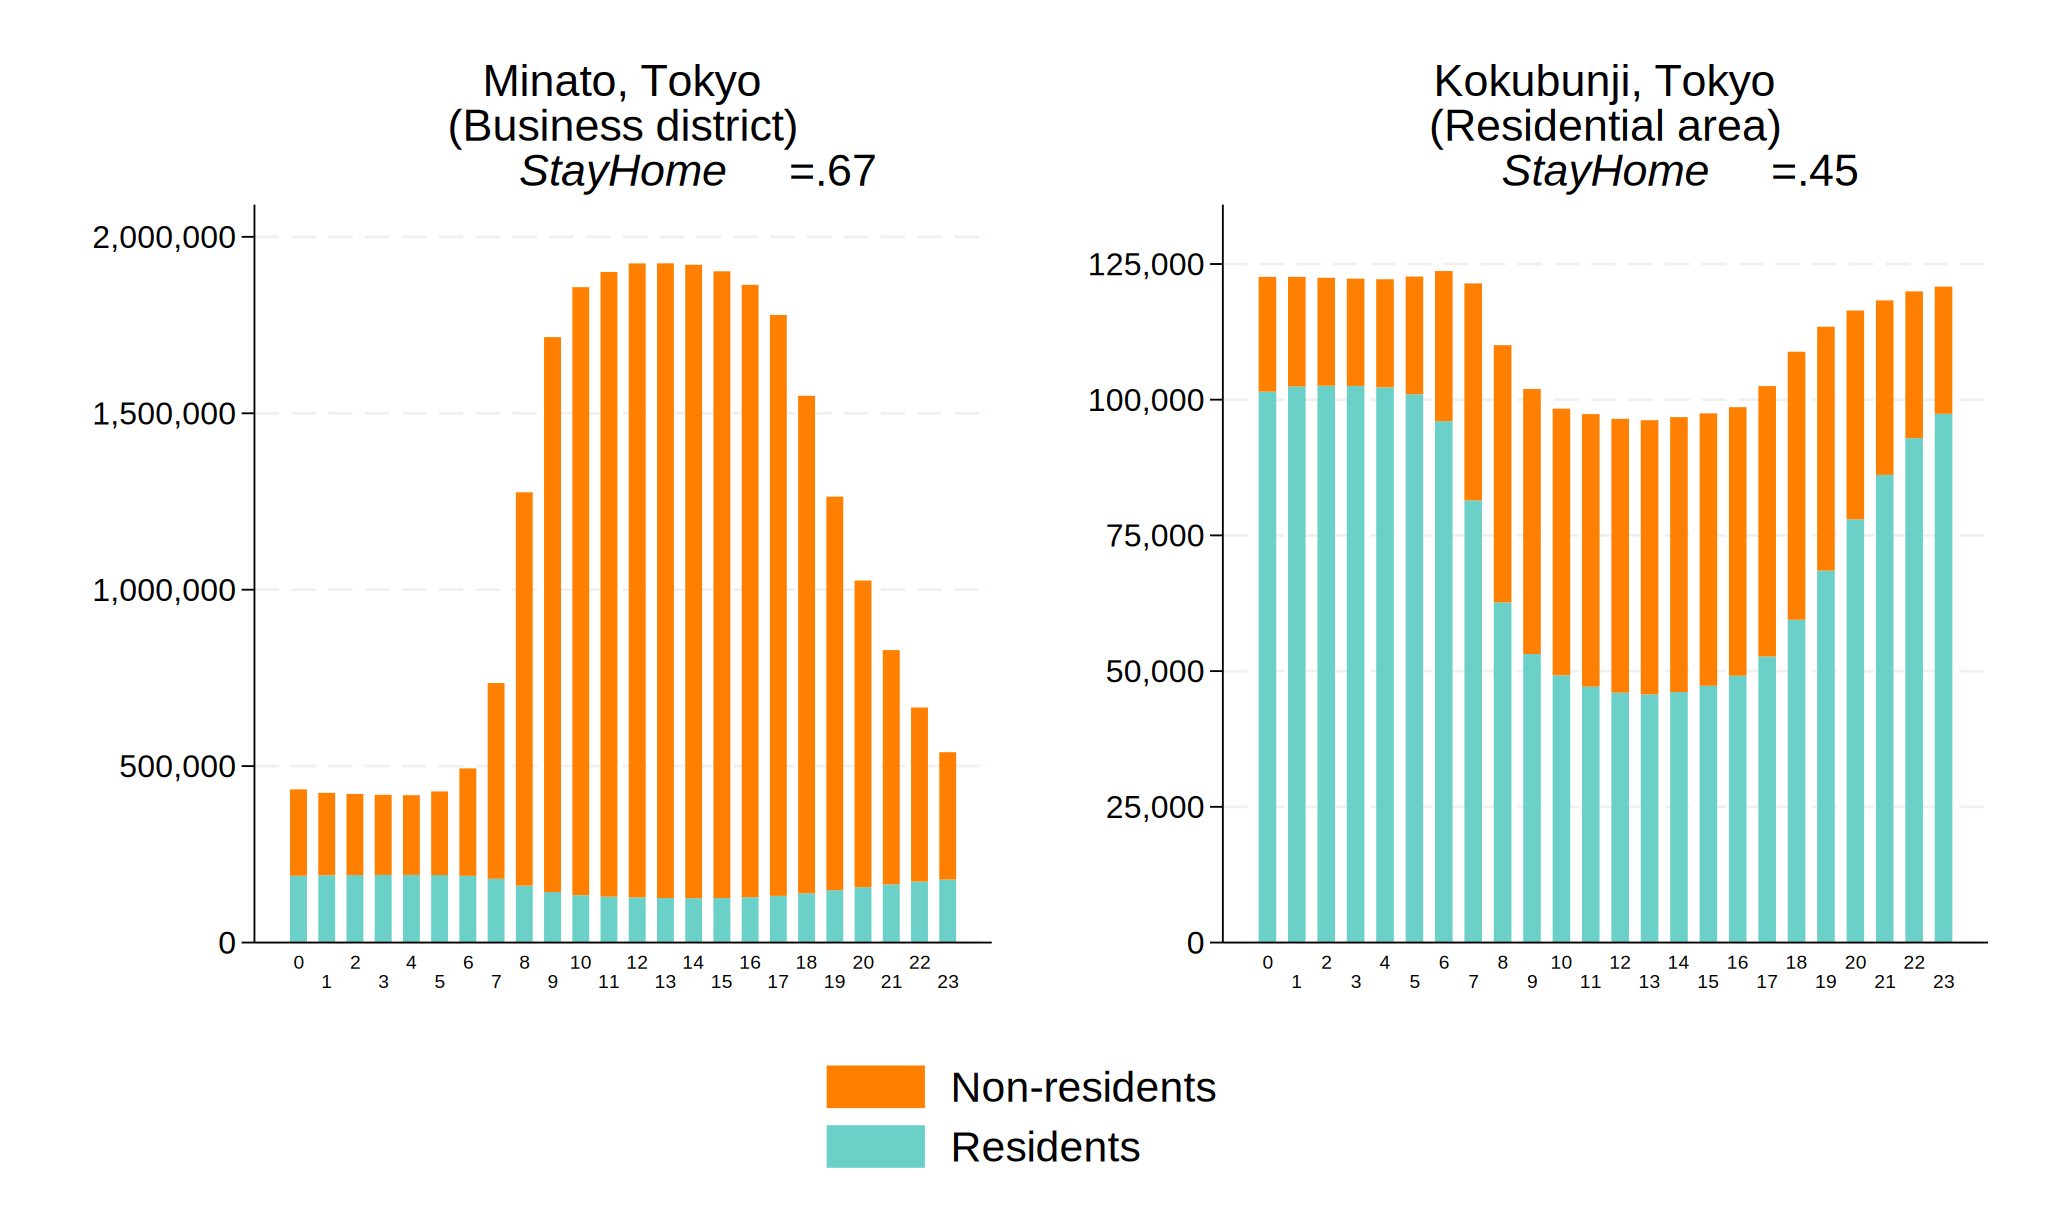

In [8]:
%%stata

qui{
capture restore   
tempfile temp
use ../data/from_to_population_flow_hour_agoop,clear
drop timezone
destring month,force replace
reshape wide population,i(year month prefcode citycode hour) j(from_area)
destring month,force replace
preserve
    
* 港区
keep if citycode=="13103"&year==2019&month==4  
gen population12=population1+population2
gen log_population0=log(population0)    
gen log_population12=log(population12)  
save `temp',replace
gen dum=0 if hour>=1 & hour<=4
replace dum=1 if hour>=11 & hour<=14
drop if dum==.    
collapse (sum) population0,by(dum)
local  stay_home= round(population0[2]/population0[1],0.01)
restore
preserve
keep if citycode=="13103"&year==2019&month==4  
sum population0
local cv = round(r(sd)/r(mean), 0.01)
use `temp',clear    
graph bar population0 population12, over(hour, label(alternate labsize(vsmall))) stack name(bar1,replace) ///
    legend(order(2 1) label(1 "Residents") label(2 "Non-residents")  position(6) col(1) region(lstyle(none)) nobox) ///
    bar(1, fcolor("106 208 200") lwidth(none)) bar(2, fcolor(orange) lwidth(none)) ///
    title("Minato, Tokyo"  "(Business district)"  "{it:StayHome}=`stay_home'") graphregion(color(white)) nodraw ///
    ylabel(, format(%15.0fc))
restore
preserve
    
* 東京都国分寺市
keep if citycode=="13214"&year==2019&month==4  
gen population12=population1+population2
gen log_population0=log(population0)    
gen log_population12=log(population12)    
save `temp',replace
gen dum=0 if hour>=1 & hour<=4
replace dum=1 if hour>=11 & hour<=14
drop if dum==.    
collapse (sum) population0,by(dum)
local  stay_home= round(population0[2]/population0[1],0.01)
restore
preserve
keep if citycode=="13214"&year==2019&month==4  
sum population0
local cv = round(r(sd)/r(mean), 0.01)
use `temp',clear        
graph bar population0 population12,over(hour,label(alternate labsize(vsmall))) stack  name(bar2,replace) ///
    legend(order(2 1) label(1 "Residents") label(2 "Non-residents")  position(6) col(1)  region(lstyle(none)) nobox) ///
    bar(1, fcolor("106 208 200") lwidth(none)) bar(2, fcolor(orange) lwidth(none)) ///
    title("Kokubunji, Tokyo"  "(Residential area)"  "{it:StayHome}=`stay_home'") graphregion(color(white)) nodraw ///
    ysc(r(0,130000)) ylab(0(25000)130000, format(%15.0fc))
restore

grc1leg bar1 bar2, legendfrom(bar2) name(foot_trafic,replace) saving(bars,replace) col(2) graphregion(color(white)) 
}

graph save ../figuretable/appendix/foot_trafic_stay_home_index.gph,replace
graph export ../figuretable/appendix/foot_trafic_stay_home_index.jpg, width(3200) replace

# Appendix B

## Figure B1: Pre-trend Test: Males 40-49

### See file "4-3_pretrent_specification_curve"

## Figure B2: Specification Curve Analysis for Males 40-49

### See file "4-3_pretrent_specification_curve"

## Figure B3: Specification Curve Analysis: Details for Females under 20

### See file "4-3_pretrent_specification_curve"

## Figure B4: Specification Curve Analysis: Details for Males 40-49

### See file "4-3_pretrent_specification_curve"

## Table B1: Descriptive Statistics

### Panel A: Suicide and stay-at-home index

In [9]:
%%stata
qui{
use ../data/suicide_analysis_data_static, clear

#delimit ;
eststo A_total: quietly estpost summarize
    suicide_f suicide_f_u20 suicide_f_20_29 suicide_f_30_39 suicide_f_40_49 suicide_f_50_59 suicide_f_o60 
    suicide_m suicide_m_u20 suicide_m_20_29 suicide_m_30_39 suicide_m_40_49 suicide_m_50_59 suicide_m_o60 
    stay_home;
eststo A_before: quietly estpost summarize
    suicide_f suicide_f_u20 suicide_f_20_29 suicide_f_30_39 suicide_f_40_49 suicide_f_50_59 suicide_f_o60 
    suicide_m suicide_m_u20 suicide_m_20_29 suicide_m_30_39 suicide_m_40_49 suicide_m_50_59 suicide_m_o60 stay_home 
    if covid == 0;
eststo A_after: quietly estpost summarize
    suicide_f suicide_f_u20 suicide_f_20_29 suicide_f_30_39 suicide_f_40_49 suicide_f_50_59 suicide_f_o60 
    suicide_m suicide_m_u20 suicide_m_20_29 suicide_m_30_39 suicide_m_40_49 suicide_m_50_59 suicide_m_o60 stay_home 
    if covid == 1;

noi:esttab A_total A_before A_after, 
cells("mean(pattern(1 1 1) fmt(%4.3f)) sd(pattern(1 1 1) fmt(%4.3f)) min(pattern(1 0 0) fmt(0)) max(pattern(1 0 0) fmt(0))") 
collabels("Mean" "Std. Dev." "Min" "Max")
mgroups("Total" "Before" "After", pattern(1 1 1)) 
nomtitles label nonumber
varwidth(20) modelwidth(6);
    
esttab A_total A_before A_after 
using  "../figuretable/appendix/summary_statistic_panel_A.tex", 
cells("mean(pattern(1 1 1) fmt(%4.3f)) sd(pattern(1 1 1) fmt(%4.3f)) min(pattern(1 0 0) fmt(0 0 %4.3f)) max(pattern(1 0 0) fmt(0 0 %4.3f))")  
mgroups("Total" "Before" "After", pattern(1 1 1) prefix(\multicolumn{@span}{c}{) suffix(}) span erepeat(\cmidrule(lr){@span})) 
nomtitles label nonumber 
booktabs alignment(D{.}{.}{-1})
replace;
};


. qui{

----------------------------------------------------------------------------
                      Total                      Before         After       
                       Mean S.. Dev.    Min    Max   Mean S.. Dev.   Mean S.. D
> ev.
----------------------------------------------------------------------------
Female suicide        5.175  6.266      0     48  4.633  5.534  5.717  6.880
Female suicide un~20  0.213  0.532      0      5  0.176  0.475  0.251  0.581
Female suicide 20-29  0.612  1.245      0     17  0.507  1.041  0.716  1.412
Female suicide 30-39  0.550  1.037      0     10  0.469  0.941  0.630  1.119
Female suicide 40-49  0.828  1.325      0     11  0.719  1.171  0.938  1.455
Female suicide 50-59  0.796  1.314      0     10  0.716  1.204  0.876  1.413
Female suicide 60s~r  2.175  2.575      0     20  2.044  2.416  2.305  2.719
Male suicide         10.667 11.519      0     87 10.529 11.241 10.804 11.793
Male suicide unde~20  0.359  0.746      0      7  0.330  0

### Panel B: Shares, shifts, and IV

In [10]:
%%stata
qui{
use ../data/suicide_analysis_data_static, clear
#delimit ;
eststo B_total: quietly estpost summarize 
    commuter_ratio 
    commuter_ratio_time00 commuter_ratio_time30u commuter_ratio_time30_60 commuter_ratio_time60_90 commuter_ratio_time90_120 commuter_ratio_time120o
    telework_ratio_time00 telework_ratio_time30u telework_ratio_time30_60 telework_ratio_time60_90 telework_ratio_time90_120 telework_ratio_time120o
    commuting_time_iv;
eststo B_before: quietly estpost summarize 
    commuter_ratio 
    commuter_ratio_time00 commuter_ratio_time30u commuter_ratio_time30_60 commuter_ratio_time60_90 commuter_ratio_time90_120 commuter_ratio_time120o
    telework_ratio_time00 telework_ratio_time30u telework_ratio_time30_60 telework_ratio_time60_90 telework_ratio_time90_120 telework_ratio_time120o
    commuting_time_iv
    if covid == 0;
eststo B_after: quietly estpost summarize 
    commuter_ratio 
    commuter_ratio_time00 commuter_ratio_time30u commuter_ratio_time30_60 commuter_ratio_time60_90 commuter_ratio_time90_120 commuter_ratio_time120o
    telework_ratio_time00 telework_ratio_time30u telework_ratio_time30_60 telework_ratio_time60_90 telework_ratio_time90_120 telework_ratio_time120o
    commuting_time_iv
    if covid == 1;

noi:esttab B_total B_before B_after, 
cells("mean(pattern(1 1 1) fmt(%4.3f)) sd(pattern(1 1 1) fmt(%4.3f)) min(pattern(1 0 0) fmt(%4.3f)) max(pattern(1 0 0) fmt(%4.3f))")
collabels("Mean" "Std. Dev." "Min" "Max")
mgroups("Total" "Before" "After", pattern(1 1 1)) 
nomtitles label nonumber 
varwidth(20) modelwidth(6);
    
esttab B_total B_before B_after 
using  "../figuretable/appendix/summary_statistic_panel_B.tex", 
cells("mean(pattern(1 1 1) fmt(%4.3f)) sd(pattern(1 1 1) fmt(%4.3f)) min(pattern(1 0 0) fmt(%4.3f)) max(pattern(1 0 0) fmt(%4.3f))")
nomtitles noobs mgroups("Total" "Before" "After", pattern(1 1 1) prefix(\multicolumn{@span}{c}{) suffix(}) span erepeat(\cmidrule(lr){@span})) 
label nonumber 
booktabs alignment(D{.}{.}{-1})
replace;
};


. qui{

----------------------------------------------------------------------------
                      Total                      Before         After       
                       Mean S.. Dev.    Min    Max   Mean S.. Dev.   Mean S.. D
> ev.
----------------------------------------------------------------------------
Commuting ratio       0.464  0.194  0.009  0.787  0.464  0.195  0.464  0.195
Commuting time 0 m~s  0.017  0.009  0.000  0.114  0.017  0.009  0.017  0.009
Commuting time (0,~s  0.589  0.175  0.142  0.929  0.589  0.175  0.589  0.175
Commuting time (30~s  0.270  0.100  0.033  0.610  0.270  0.100  0.270  0.100
Commuting time (60~s  0.090  0.084  0.000  0.431  0.090  0.084  0.090  0.084
Commuting time (90~s  0.025  0.029  0.000  0.213  0.025  0.029  0.025  0.029
Commuting time $>$~s  0.009  0.008  0.000  0.086  0.009  0.008  0.009  0.008
Work from home rat~   1.000  0.000  1.000  1.000  1.000  0.000  1.000  0.000
Work from home rat~   0.055  0.025  0.030  0.080  0.030  0

### Panel C: Time-invariant covariates

In [11]:
%%stata
qui{
use ../data/suicide_analysis_data_static, clear
#delimit ;
eststo C_total: quietly estpost summarize
    industry_large_1_15 industry_large_2_15 industry_large_3_15 
    young_rate middle_rate elderly_rate labor_force_rate self_employee_rate single_household_ratio is_city;

noi:esttab C_total, 
cells("mean(pattern(1 1 1) fmt(%4.3f)) sd(pattern(1 1 1) fmt(%4.3f)) min(pattern(1 0 0) fmt(%4.3f)) max(pattern(1 0 0) fmt(%4.3f))") 
collabels("Mean" "Std. Dev." "Min" "Max")
mgroups("Total" "Before" "After", pattern(1 1 1)) 
nomtitles label nonumber
varwidth(20) modelwidth(6);

esttab C_total
using  "../figuretable/appendix/summary_statistic_panel_C.tex", 
cells("mean(pattern(1 1 1) fmt(%4.3f)) sd(pattern(1 1 1) fmt(%4.3f)) min(pattern(1 0 0) fmt(%4.3f)) max(pattern(1 0 0) fmt(%4.3f))")
mgroups("Total" "Before" "After", pattern(1 1 1) prefix(\multicolumn{@span}{c}{) suffix(}) span erepeat(\cmidrule(lr){@span})) 
nomtitles label nonumber 
booktabs alignment(D{.}{.}{-1})
replace;
};


. qui{

------------------------------------------------
                      Total                     
                       Mean S.. Dev.    Min    Max
------------------------------------------------
Primary industry r~e  0.060  0.063  0.000  0.395
Secondary industry~e  0.259  0.075  0.081  0.512
Tertiary industry ~e  0.681  0.096  0.430  0.919
Young rate            0.124  0.019  0.057  0.207
Middle rate           0.583  0.043  0.413  0.748
Elderly rate          0.285  0.057  0.149  0.518
Labor force rate      0.569  0.039  0.387  0.699
Self-employment rate  0.100  0.032  0.042  0.246
Single person hous~e  0.139  0.028  0.032  0.231
City                  0.782  0.413  0.000  1.000
------------------------------------------------
Observations           2482                     
------------------------------------------------

. 


### Panel D: Time-varying covariates

In [12]:
%%stata
qui{    
#delimit ;
eststo D_total: quietly estpost summarize 
    active_opening_ratio unemployment_rate patient covid_death_cases;
eststo D_before: quietly estpost summarize
    active_opening_ratio unemployment_rate patient covid_death_cases if covid == 0;
eststo D_after: quietly estpost summarize 
    active_opening_ratio unemployment_rate patient covid_death_cases if covid == 1;

noi:esttab D_total D_before D_after, 
cells("mean(pattern(1 1 1) fmt(%4.3f)) sd(pattern(1 1 1) fmt(%4.3f)) min(pattern(1 0 0) fmt(%4.3f %4.3f 0 0)) max(pattern(1 0 0) fmt(%4.3f %4.3f %5.0fc %5.0fc))") 
collabels("Mean" "Std. Dev." "Min" "Max")
mgroups("Total" "Before" "After", pattern(1 1 1)) 
nomtitles label nonumber
stats(N, fmt(%5.0fc) labels("Observations"))
varwidth(20) modelwidth(6);
    
esttab D_total D_before D_after 
using "../figuretable/appendix/summary_statistic_panel_D.tex", 
cells("mean(pattern(1 1 1) fmt(%4.3f)) sd(pattern(1 1 1) fmt(%4.3f)) min(pattern(1 0 0) fmt(%4.3f %4.3f 0 0)) max(pattern(1 0 0) fmt(%4.3f %4.3f %5.0fc %5.0fc))")  
mgroups("Total" "Before" "After", pattern(1 1 1) prefix(\multicolumn{@span}{c}{) suffix(}) span erepeat(\cmidrule(lr){@span})) 
nomtitles label nonumber 
booktabs alignment(D{.}{.}{-1})
replace;
};


. qui{    

----------------------------------------------------------------------------
                      Total                      Before         After       
                       Mean S.. Dev.    Min    Max   Mean S.. Dev.   Mean S.. D
> ev.
----------------------------------------------------------------------------
Active opening ratio  1.361  0.644  0.000  8.935  1.586  0.723  1.136  0.453
Unemployment rate     2.436  0.493  1.250  3.600  2.195  0.386  2.677  0.471
Covid patients       198.323 539.576      0  3,311  0.943  1.811 395.703 710.30
> 7
Covid death cases     3.085  4.227      0     14  0.000  0.000  6.171  4.086
----------------------------------------------------------------------------
Observations          2,482                       1,241         1,241       
----------------------------------------------------------------------------

. 


### Export to a stacked table

In [13]:
%%stata
qui{
#delimit ;   
*Panel A;
esttab A_total A_before A_after 
using "../figuretable/appendix/summary_statistics.tex", 
prehead("\begin{tabular}{l*{9}{c}} \toprule") 
posthead("\hline \\ \multicolumn{1}{l}{\textit{Panel A: Suicide and Stay-at-home variable}} \\\\[-1ex]") 
fragment 
cells("mean(pattern(1 1 1) fmt(%4.3f)) sd(pattern(1 1 1) fmt(%4.3f)) min(pattern(1 0 0) fmt(0)) max(pattern(1 0 0) fmt(0))") 
mgroups("Total" "Before" "After", pattern(1 1 1) prefix(\multicolumn{@span}{c}{) suffix(}) span erepeat(\cmidrule(lr){@span})) 
collabels("Mean" "Std. Dev." "Min" "Max")
nomtitles label nonumber noobs
booktabs alignment(D{.}{.}{-1}) 
replace;

* Panel B;
esttab B_total B_before B_after
using "../figuretable/appendix/summary_statistics.tex", 
posthead("\\ \multicolumn{1}{l}{\textit{Panel B: Shares, shifts, and IV}} \\\\[-1ex]") 
cells("mean(pattern(1 1 1) fmt(%4.3f)) sd(pattern(1 1 1) fmt(%4.3f)) min(pattern(1 0 0) fmt(%4.3f)) max(pattern(1 0 0) fmt(%4.3f))") 
fragment append
label collabels(none) nomtitles nonumbers noobs
booktabs alignment(D{.}{.}{-1});

* Panel C;
esttab C_total
using "../figuretable/appendix/summary_statistics.tex", 
posthead("\\ \multicolumn{1}{l}{\textit{Panel C: Time-invariant covariates}} \\\\[-1ex]") 
cells("mean(pattern(1 1 1) fmt(%4.3f)) sd(pattern(1 1 1) fmt(%4.3f)) min(pattern(1 0 0) fmt(%4.3f)) max(pattern(1 0 0) fmt(%4.3f))") 
fragment append
label collabels(none) nomtitles nonumbers noobs
booktabs alignment(D{.}{.}{-1});

* Panel D;
esttab D_total D_before D_after 
using "../figuretable/appendix/summary_statistics.tex", 
posthead("\\ \multicolumn{1}{l}{\textit{Panel D: Time-varying covariates}} \\\\[-1ex]") 
fragment append 
cells("mean(pattern(1 1 1) fmt(%4.3f)) sd(pattern(1 1 1) fmt(%4.3f)) min(pattern(1 0 0) fmt(%4.3f %4.3f 0 0)) max(pattern(1 0 0) fmt(%4.3f %4.3f %5.0fc %5.0fc))") 
label collabels(none) nomtitles nonumbers 
stats(N, fmt(%5.0fc) labels("Observations"))
booktabs alignment(D{.}{.}{-1}) 
postfoot("\bottomrule \end{tabular}");
};


. qui{

. 


## Table B2: In-sumple and Out-of-sample difference in variables
- この部分のみ、全ての市区町村のデータを含んでいる、`suicide_analysis_data_static_allmuni.dta` を使用 

### Panel A: Suicide and stay-at-home index

In [15]:
%%stata
qui{
use ../data/suicide_analysis_data_static_allmuni, clear

#delimit ;
eststo A_in_before: quietly estpost summarize
    suicide_f suicide_f_u20 suicide_f_20_29 suicide_f_30_39 suicide_f_40_49 suicide_f_50_59 suicide_f_o60 
    suicide_m suicide_m_u20 suicide_m_20_29 suicide_m_30_39 suicide_m_40_49 suicide_m_50_59 suicide_m_o60 
    stay_home 
    if covid == 0 & has_commute_time==1;
eststo A_out_before: quietly estpost summarize
    suicide_f suicide_f_u20 suicide_f_20_29 suicide_f_30_39 suicide_f_40_49 suicide_f_50_59 suicide_f_o60 
    suicide_m suicide_m_u20 suicide_m_20_29 suicide_m_30_39 suicide_m_40_49 suicide_m_50_59 suicide_m_o60 
    stay_home 
    if covid == 0 & has_commute_time==0;
eststo A_diff_before: estpost ttest 
    suicide_f suicide_f_u20 suicide_f_20_29 suicide_f_30_39 suicide_f_40_49 suicide_f_50_59 suicide_f_o60 
    suicide_m suicide_m_u20 suicide_m_20_29 suicide_m_30_39 suicide_m_40_49 suicide_m_50_59 suicide_m_o60 
    stay_home
    if covid == 0, 
    by(has_commute_time) unequal;

eststo A_in_after: quietly estpost summarize
    suicide_f suicide_f_u20 suicide_f_20_29 suicide_f_30_39 suicide_f_40_49 suicide_f_50_59 suicide_f_o60 
    suicide_m suicide_m_u20 suicide_m_20_29 suicide_m_30_39 suicide_m_40_49 suicide_m_50_59 suicide_m_o60 
    stay_home 
    if covid == 1 & has_commute_time==1;
eststo A_out_after: quietly estpost summarize
    suicide_f suicide_f_u20 suicide_f_20_29 suicide_f_30_39 suicide_f_40_49 suicide_f_50_59 suicide_f_o60 
    suicide_m suicide_m_u20 suicide_m_20_29 suicide_m_30_39 suicide_m_40_49 suicide_m_50_59 suicide_m_o60 
    stay_home 
    if covid == 1 & has_commute_time==0;
eststo A_diff_after: estpost ttest 
    suicide_f suicide_f_u20 suicide_f_20_29 suicide_f_30_39 suicide_f_40_49 suicide_f_50_59 suicide_f_o60 
    suicide_m suicide_m_u20 suicide_m_20_29 suicide_m_30_39 suicide_m_40_49 suicide_m_50_59 suicide_m_o60 
    stay_home
    if covid == 1, 
    by(has_commute_time) unequal;

noi:esttab A_in_before A_out_before A_diff_before A_in_after A_out_after A_diff_after, 
    cells("mean(pattern(1 1 0 1 1 0) fmt(%4.3f))  b(pattern(0 0 1 0 0 1) fmt(%4.3f))" "sd(par([ ]) fmt(%4.3f) pattern(1 1 0 1 1 0)) se(pattern(0 0 1 0 0 1) par fmt(%4.3f))") 
    mgroups("Before" "After", pattern(1 0 0 1 0 0)) 
    stats(N, fmt(%5.0fc) labels("Observations"))
    mtitles("Included" "Excluded" "Diff of Means" "Included" "Excluded" "Diff of Means")
    label collabels(,none)
    varwidth(15) modelwidth(8);
};

SystemError: 
. qui{
file ../data/suicide_analysis_data_static_allmuni.dta not found
r(601);
r(601);


### Panel B: Commuter ratio

In [21]:
%%stata
qui{
#delimit ;
eststo B_in_before: quietly estpost summarize
    commuter_ratio
    if covid == 0 & has_commute_time==1;
eststo B_out_before: quietly estpost summarize
    commuter_ratio
    if covid == 0 & has_commute_time==0;
eststo B_diff_before: estpost ttest 
    commuter_ratio
    if covid == 0, by(has_commute_time) unequal;

noi:esttab B_in_before B_out_before B_diff_before, 
    cells("mean(pattern(1 1 0) fmt(%4.3f))  b(pattern(0 0 1) fmt(%4.3f))" "sd(par([ ]) fmt(%4.3f) pattern(1 1 0)) se(pattern(0 0 1) par fmt(%4.3f))") 
    mgroups("Before", pattern(1 0)) 
    mtitles("Included" "Excluded" "Diff of Means")
    stats(N, fmt(%5.0fc) labels("Observations"))
    label collabels(,none)
    varwidth(15) modelwidth(8);
};


. qui{

------------------------------------------
                  Before                  
                     (1)      (2)      (3)
                Included Excluded Diff o~s
------------------------------------------
Commuting ratio    0.464    0.356   -0.108
                 [0.195]  [0.201]  (0.010)
------------------------------------------
Observations       1,241      650    1,891
------------------------------------------

. 


### Panel C: Time-invariant covariates

In [22]:
%%stata
qui{
#delimit ;
eststo C_in_before: quietly estpost summarize
    industry_large_1_15 industry_large_2_15 industry_large_3_15 
    young_rate middle_rate elderly_rate labor_force_rate self_employee_rate single_household_ratio is_city
    if covid == 0 & has_commute_time == 1;
eststo C_out_before: quietly estpost summarize
    industry_large_1_15 industry_large_2_15 industry_large_3_15 
    young_rate middle_rate elderly_rate labor_force_rate self_employee_rate single_household_ratio is_city
    if covid == 0 & has_commute_time == 0;
eststo C_diff_before: estpost ttest 
    industry_large_1_15 industry_large_2_15 industry_large_3_15 
    young_rate middle_rate elderly_rate labor_force_rate self_employee_rate single_household_ratio is_city
    if covid == 0, 
    by(has_commute_time) unequal;

noi:esttab C_in_before C_out_before C_diff_before, 
    cells("mean(pattern(1 1 0) fmt(%4.3f))  b(pattern(0 0 1) fmt(%4.3f))" "sd(par([ ]) fmt(%4.3f) pattern(1 1 0)) se(pattern(0 0 1) par fmt(%4.3f))") 
    mgroups("Before", pattern(1 0)) 
    mtitles("Included" "Excluded" "Diff of Means")
    stats(N, fmt(%5.0fc) labels("Observations"))
    label collabels(,none)
    varwidth(15) modelwidth(8);
};


. qui{

------------------------------------------
                  Before                  
                     (1)      (2)      (3)
                Included Excluded Diff o~s
------------------------------------------
Primary indus~e    0.060    0.184    0.124
                 [0.063]  [0.114]  (0.005)
Secondary ind~e    0.259    0.240   -0.019
                 [0.075]  [0.091]  (0.004)
Tertiary indu~e    0.681    0.576   -0.105
                 [0.096]  [0.097]  (0.005)
Young rate         0.124    0.108   -0.016
                 [0.019]  [0.027]  (0.001)
Middle rate        0.583    0.528   -0.055
                 [0.043]  [0.052]  (0.002)
Elderly rate       0.285    0.362    0.077
                 [0.057]  [0.072]  (0.003)
Labor force r~e    0.569    0.584    0.015
                 [0.039]  [0.064]  (0.003)
Self-employme~e    0.100    0.156    0.056
                 [0.032]  [0.049]  (0.002)
Single person~e    0.139    0.117   -0.023
                 [0.028]  [0.036]  (0.002)
Ci

### Panel D: Time-varying covariates

In [23]:
%%stata
qui{    
#delimit ;
eststo D_in_before: quietly estpost summarize
    active_opening_ratio unemployment_rate patient covid_death_cases 
    if covid == 0 & has_commute_time == 1;
eststo D_out_before: quietly estpost summarize 
    active_opening_ratio unemployment_rate patient covid_death_cases 
    if covid == 0 & has_commute_time == 0;
eststo D_diff_before: estpost ttest 
    active_opening_ratio unemployment_rate patient covid_death_cases 
    if covid == 0, 
    by(has_commute_time) unequal;

eststo D_in_after: quietly estpost summarize 
    active_opening_ratio unemployment_rate patient covid_death_cases 
    if covid == 1 & has_commute_time == 1;
eststo D_out_after: quietly estpost summarize 
    active_opening_ratio unemployment_rate patient covid_death_cases 
    if covid == 1 & has_commute_time == 0;
eststo D_diff_after: estpost ttest 
    active_opening_ratio unemployment_rate patient covid_death_cases 
    if covid == 1, 
    by(has_commute_time) unequal;

noi:esttab D_in_before D_out_before D_diff_before D_in_after D_out_after D_diff_after, 
    cells("mean(pattern(1 1 0 1 1 0) fmt(%4.3f))  b(pattern(0 0 1 0 0 1) fmt(%4.3f))" "sd(pattern(1 1 0 1 1 0) par([ ]) fmt(%4.3f)) se(pattern(0 0 1 0 0 1) par fmt(%4.3f))") 
    mgroups("Before" "After", pattern(1 0 0 1 0 0)) 
    mtitles("Included" "Excluded" "Diff of Means" "Included" "Excluded" "Diff of Means")
    stats(N, fmt(%5.0fc) labels("Observations"))
    label collabels(,none)
    varwidth(15) modelwidth(8);
};


. qui{    

---------------------------------------------------------------------
                  Before                      After                  
                     (1)      (2)      (3)      (4)      (5)      (6)
                Included Excluded Diff o~s Included Excluded Diff o~s
---------------------------------------------------------------------
Active openin~o    1.586    1.530   -0.056    1.136    1.179    0.043
                 [0.723]  [0.962]  (0.043)  [0.453]  [0.616]  (0.027)
Unemployment ~e    2.195    2.211    0.017    2.677    2.660   -0.017
                 [0.386]  [0.368]  (0.018)  [0.471]  [0.450]  (0.022)
Covid patients     0.943    0.934   -0.009  395.703  163.832 -231.871
                 [1.811]  [2.300]  (0.104) [710.307] [291.374] (23.177)
Covid death c~s    0.000    0.000    0.000    6.171    5.949   -0.221
                 [0.000]  [0.000]  (0.000)  [4.086]  [4.920]  (0.225)
---------------------------------------------------------------------
Obser

### Export to Stacked table

In [24]:
%%stata
qui{
#delimit ;   
*Panel A;
esttab A_in_before A_out_before A_diff_before A_in_after A_out_after A_diff_after 
  using "../figuretable/appendix/incl_excl_sample_comparison.tex",
  prehead("\begin{tabular}{l*{7}{c}} \toprule") 
  posthead("\hline \\ \multicolumn{1}{l}{\textit{Panel A: Suicide and Stay-at-home variable}} \\\\[-1ex]") 
  fragment 
  cells("mean(pattern(1 1 0 1 1 0) fmt(%4.3f))  b(pattern(0 0 1 0 0 1) fmt(%4.3f))" "sd(par([ ]) fmt(%4.3f) pattern(1 1 0 1 1 0)) se(pattern(0 0 1 0 0 1) par fmt(%4.3f))") 
  mgroups("Before" "After", pattern(1 0 0 1 0 0)  prefix(\multicolumn{@span}{c}{) suffix(}) span erepeat(\cmidrule(lr){@span})) 
  mtitles("Included" "Excluded" "Diff of Means" "Included" "Excluded" "Diff of Means")
  collabels(none) label nonumber noobs
  booktabs alignment(D{.}{.}{-1}) 
  replace; 

* Panel B;
esttab B_in_before B_out_before B_diff_before
  using "../figuretable/appendix/incl_excl_sample_comparison.tex",
  posthead("\\ \multicolumn{1}{l}{\textit{Panel B: Commuting ratio}} \\\\[-1ex]") 
  cells("mean(pattern(1 1 0) fmt(%4.3f))  b(pattern(0 0 1) fmt(%4.3f))" "sd(par([ ]) fmt(%4.3f) pattern(1 1 0)) se(pattern(0 0 1) par fmt(%4.3f))") 
  collabels(none) label nonumber nomtitles noobs
  fragment append 
  booktabs alignment(D{.}{.}{-1});

* Panel C;
esttab C_in_before C_out_before C_diff_before
  using "../figuretable/appendix/incl_excl_sample_comparison.tex",
  posthead("\\ \multicolumn{1}{l}{\textit{Panel C: Time-invariant covariates}} \\\\[-1ex]") 
  fragment append 
  cells("mean(pattern(1 1 0) fmt(%4.3f))  b(pattern(0 0 1) fmt(%4.3f))" "sd(par([ ]) fmt(%4.3f) pattern(1 1 0)) se(pattern(0 0 1) par fmt(%4.3f))") 
  collabels(none) label nonumber nomtitles noobs
  booktabs alignment(D{.}{.}{-1});

* Panel D;
esttab D_in_before D_out_before D_diff_before D_in_after D_out_after D_diff_after
  using "../figuretable/appendix/incl_excl_sample_comparison.tex",
  posthead("\\ \multicolumn{1}{l}{\textit{Panel D: Time-varying covariates}} \\\\[-1ex]") 
  fragment append 
  cells("mean(pattern(1 1 0 1 1 0) fmt(%4.3f))  b(pattern(0 0 1 0 0 1) fmt(%4.3f))" "sd(pattern(1 1 0 1 1 0) par([ ]) fmt(%4.3f)) se(pattern(0 0 1 0 0 1) par fmt(%4.3f))") 
  collabels(none) label nonumber nomtitles
  stats(N, fmt(%5.0fc) labels("Observations"))
  booktabs alignment(D{.}{.}{-1})
  postfoot("\bottomrule \end{tabular}");
};


. qui{

. 


### Included vs. Excluded sample population

In [25]:
%%stata
qui{
use ../data/suicide_analysis_data_static_allmuni,clear

keep if covid==0

collapse (sum) population, by(has_commute_time)

egen total_population = total(population)
gen ratio = population / total_population

preserve
keep if has_commute_time == 1
noi: display "Population with commute time: " %15.0fc population
noi: display "Ratio of population with commute time: " ratio * 100
restore 

preserve
keep if has_commute_time == 0
noi: display "Population without commute time: " %15.0fc population
noi: display "Ratio of population without commute time: " ratio * 100
restore 
}


. qui{
Population with commute time:     122,783,379
Ratio of population with commute time: 96.607786
Population without commute time:       4,311,325
Ratio of population without commute time: 3.3922147

. 


## Table B3: Descriptive Statistics for Commuter Type

In [26]:
%%stata
qui{
use ../data/suicide_analysis_data_static, clear

label variable commuter_ratio_time00 "0 mins"
label variable commuter_ratio_time30u "(0, 30] mins"
label variable commuter_ratio_time30_60 "(30, 60] mins"
label variable commuter_ratio_time60_90 "(60, 90] mins"
label variable commuter_ratio_time90_120 "(90, 120] mins"
label variable commuter_ratio_time120o "$>$ 120 mins"
label variable commuter_ratio_time90o "$>$ 90 mins"

label variable telework_ratio_time00_bc "0 mins"
label variable telework_ratio_time30u_bc "(0, 30] mins"
label variable telework_ratio_time30_60_bc "(30, 60] mins"
label variable telework_ratio_time60_90_bc "(60, 90] mins"
label variable telework_ratio_time90_120_bc "(90, 120] mins"
label variable telework_ratio_time120o_bc "$>$ 120 mins"
label variable telework_ratio_time90o_bc "$>$ 90 mins"
label variable telework_ratio_time00_ac "0 mins"
label variable telework_ratio_time30u_ac "(0, 30] mins"
label variable telework_ratio_time30_60_ac "(30, 60] mins"
label variable telework_ratio_time60_90_ac "(60, 90] mins"
label variable telework_ratio_time90_120_ac "(90, 120] mins"
label variable telework_ratio_time120o_ac "$>$ 120 mins"
label variable telework_ratio_time90o_ac "$>$ 90 mins"

#delimit ;
eststo share: quietly estpost summarize 
	commuter_ratio_time00 commuter_ratio_time30u commuter_ratio_time30_60 
	commuter_ratio_time60_90 commuter_ratio_time90_120 commuter_ratio_time120o commuter_ratio_time90o;
    
eststo shift_bc: quietly estpost summarize 
	telework_ratio_time00_bc telework_ratio_time30u_bc telework_ratio_time30_60_bc 
	telework_ratio_time60_90_bc telework_ratio_time90_120_bc telework_ratio_time120o_bc telework_ratio_time90o_bc;

eststo shift_ac: quietly estpost summarize 
	telework_ratio_time00_ac telework_ratio_time30u_ac telework_ratio_time30_60_ac 
	telework_ratio_time60_90_ac telework_ratio_time90_120_ac telework_ratio_time120o_ac telework_ratio_time90o_ac;

noi: esttab share shift_bc shift_ac,
cells("mean(fmt(%4.3f))") 
collabels(none)
rename(
	telework_ratio_time00_bc commuter_ratio_time00
	telework_ratio_time30u_bc commuter_ratio_time30u
	telework_ratio_time30_60_bc commuter_ratio_time30_60
	telework_ratio_time60_90_bc commuter_ratio_time60_90
	telework_ratio_time90_120_bc commuter_ratio_time90_120
	telework_ratio_time120o_bc commuter_ratio_time120o
	telework_ratio_time90o_bc commuter_ratio_time90o
	telework_ratio_time00_ac commuter_ratio_time00
	telework_ratio_time30u_ac commuter_ratio_time30u
	telework_ratio_time30_60_ac commuter_ratio_time30_60
	telework_ratio_time60_90_ac commuter_ratio_time60_90
	telework_ratio_time90_120_ac commuter_ratio_time90_120
	telework_ratio_time120o_ac commuter_ratio_time120o
	telework_ratio_time90o_ac commuter_ratio_time90o
	)
label nonumber nomtitles noobs
mlabels("Share (cr_k)" "Shift (WFH0)" "Shift (WFH1)", lhs("Commuting time (\$k$)"))
varwidth(10) modelwidth(15);
    
esttab share shift_bc shift_ac
using "../figuretable/appendix/commuting_time_shift_share.tex", 
cells("mean(fmt(%4.3f))") 
rename(
	telework_ratio_time00_bc commuter_ratio_time00
	telework_ratio_time30u_bc commuter_ratio_time30u
	telework_ratio_time30_60_bc commuter_ratio_time30_60
	telework_ratio_time60_90_bc commuter_ratio_time60_90
	telework_ratio_time90_120_bc commuter_ratio_time90_120
	telework_ratio_time120o_bc commuter_ratio_time120o
	telework_ratio_time90o_bc commuter_ratio_time90o
	telework_ratio_time00_ac commuter_ratio_time00
	telework_ratio_time30u_ac commuter_ratio_time30u
	telework_ratio_time30_60_ac commuter_ratio_time30_60
	telework_ratio_time60_90_ac commuter_ratio_time60_90
	telework_ratio_time90_120_ac commuter_ratio_time90_120
	telework_ratio_time120o_ac commuter_ratio_time120o
	telework_ratio_time90o_ac commuter_ratio_time90o
	)
label collabels(none) nonumber nomtitles noobs replace
mlabels("\$\bar(z)_k$" "\$g_{k0}$" "\$g_{k1}$", lhs("Commuting time (\$k$)"))
substitute(\_ _)
booktabs alignment(D{.}{.}{-1});
};


. qui{

----------------------------------------------------------
Commutin~)    Share (cr_k)    Shift (WFH0)    Shift (WFH1)
----------------------------------------------------------
0 mins               0.017           1.000           1.000
(0, 30] ~s           0.589           0.030           0.080
(30, 60]~s           0.270           0.075           0.230
(60, 90]~s           0.090           0.106           0.294
(90, 120~s           0.025           0.108           0.320
$>$ 120 ~s           0.009           0.202           0.244
$>$ 90 m~s           0.033           0.142           0.292
----------------------------------------------------------

. 


#### k の列と横線を python を使って追加

In [ ]:
import re

# --- 設定 ---
input_path = '../figuretable/appendix/commuting_time_shift_share.tex'
output_path = input_path  # 上書き保存

# k 値リスト（末尾が最後のデータ行に対応）
k_values = ['0', '1', '2', '3', '4', '5', '4']

# --- 読み込み ---
with open(input_path, 'r', encoding='utf-8') as f:
    lines = f.readlines()

out_lines = []
in_table = False
header_done = False
row_idx = 0
total_rows = len(k_values)

for line in lines:
    # タブラー開始行の検出と列仕様の修正
    if '\\begin{tabular' in line:
        line = re.sub(r'\{l', '{lc', line)
        in_table = True

    # ヘッダ行の処理（“Commuting time” 含みかつ '\\' で終わる行）
    if in_table and not header_done and 'Commuting time' in line and '\\\\' in line:
        content, _ = line.rstrip('\n').split('\\\\', 1)
        cols = [c.strip() for c in content.split('&')]
        cols[0] = re.sub(r'\s*\(\$k\$\)', '', cols[0])  # ($k$) を除去
        cols.insert(1, 'k')                            # 第2列に k
        line = ' & '.join(cols) + ' \\\\\n'
        header_done = True

    # データ行の処理（“min” を含みかつ '\\\\' で終わる行）
    if in_table and header_done and 'min' in line and '&' in line and '\\\\' in line:
        content, _ = line.rstrip('\n').split('\\\\', 1)
        parts = [p.strip() for p in content.split('&')]

        # 最後の行の直前に midrule を挿入
        if row_idx == total_rows - 1:
            out_lines.append('    \\cmidrule\n')

        # k 値を挿入
        if row_idx < total_rows:
            parts.insert(1, k_values[row_idx])
            row_idx += 1

        # 単一の '\\'
        line = ' & '.join(parts) + ' \\\\\n'

    # タブラー終了行の検出
    if '\\end{tabular' in line:
        in_table = False

    out_lines.append(line)

# --- 書き出し ---
with open(output_path, 'w', encoding='utf-8') as f:
    f.writelines(out_lines)

print(f"Inserted 'k' column and '\\midrule' before last row. Saved to {output_path}")


## Table B6: Correlation between the Share of 60-90-Minute Commuters and Municipality Characteristics

In [27]:
%%stata
qui{
use ../data/suicide_analysis_data_static,clear

label variable young_rate "Young rate (under 15)"
label variable middle_rate "Middle rate (between 15-64)"
label variable elderly_rate "Elderly rate (above 64)"

* make industry covariates 
global industry_share_2015 "industry_large_1_15 industry_large_2_15 industry_large_3_15" 
global other_covariates "young_rate middle_rate elderly_rate self_employee_rate labor_force_rate single_household_ratio "
global other_covariates_all "young_rate middle_rate elderly_rate employment_rate employee_rate self_employee_rate labor_force_rate single_household_ratio "

reg commuter_ratio_time60_90 is_city if covid==0, nocons
est store reg_city
reg commuter_ratio_time60_90 $industry_share_2015 if covid==0, nocons
est store reg_industry
reg commuter_ratio_time60_90 is_city $industry_share_2015 if covid==0, nocons
est store reg_city_industry
reg commuter_ratio_time60_90 is_city $industry_share_2015 $other_covariates_all if covid==0, nocons
est store reg_all

#delimit ;
noi: esttab reg_city reg_industry reg_city_industry reg_all, 
  cells(b(fmt(3)) se(fmt(3) par) p(fmt(3) par([ ]))) stats(r2_a N, fmt(%4.3f %5.0fc) labels("Adj.R-Squared" "Observations"))
  label star(* 0.10 ** 0.05  *** 0.01) varwidth(10) modelwidth(8) nomtitles collabels(none);

esttab reg_city reg_industry reg_city_industry reg_all 
  using "../figuretable/appendix/correlation_share_municipality_characteristics.tex",
  cells(b(fmt(3)) se(fmt(3) par) p(fmt(3) par([ ]))) stats(r2_a N, fmt(%4.3f %5.0fc) labels("Adj.R-Squared" "Observations"))
  label star(* 0.10 ** 0.05  *** 0.01) nomtitles collabels(none) 
  booktabs alignment(D{.}{.}{-1})
  replace;
};


. qui{

----------------------------------------------
                (1)      (2)      (3)      (4)
----------------------------------------------
City          0.096             0.000    0.016
            (0.003)           (0.005)  (0.004)
            [0.000]           [0.938]  [0.000]
Primary ~e            -0.398   -0.398    0.293
                     (0.031)  (0.031)  (0.241)
                     [0.000]  [0.000]  [0.225]
Secondar~e            -0.114   -0.114   -0.037
                     (0.020)  (0.020)  (0.236)
                     [0.000]  [0.000]  [0.875]
Tertiary~e             0.211    0.211    0.434
                     (0.008)  (0.009)  (0.226)
                     [0.000]  [0.000]  [0.055]
Young ~15)                              -1.786
                                       (0.211)
                                       [0.000]
Middle~64)                               0.125
                                       (0.187)
                                       [0.503]
Elde